# Grouping and Aggregate Data

v2: 1st November 2023: Contains cleaning of prices column

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import files

### Import orders_merged_busy_dayshours.csv

In [2]:
# loading orders_product_merged_busy_dayshours file
path = r'/Users/patel/Documents/CF-Data Anaylst Course/Achievement-4/Instacart Basket Analysis-Oct 2023/02 Data/'

df_ords_prod_merged = pd.read_pickle(os.path.join(path, 'Prepared Data/orders_product_merged_busy_dayshours.pkl'))
df_ords_prod_merged.head()

,order_id,user_id,number_of_orders,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busy_slow_days,busiest_hours
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regular busy,Regular days,Average orders
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regular busy,Slowest days,Average orders
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regular busy,Slowest days,Most orders
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders


## Cleaning Prices Column

### Prices Distribution using Histogram

<Axes: ylabel='Frequency'>

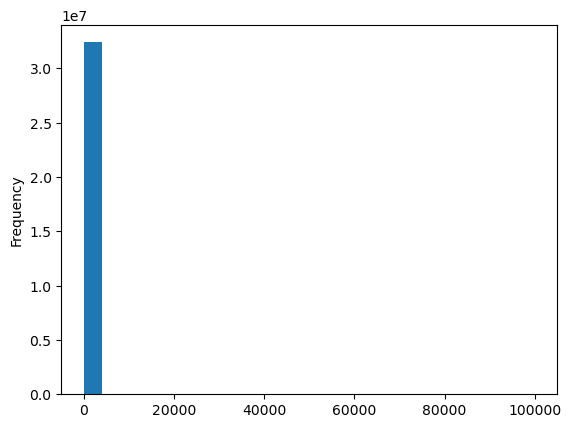

In [3]:
df_ords_prod_merged['prices'].plot.hist(bins=25)

### Scatterplot to find outliers in prices

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

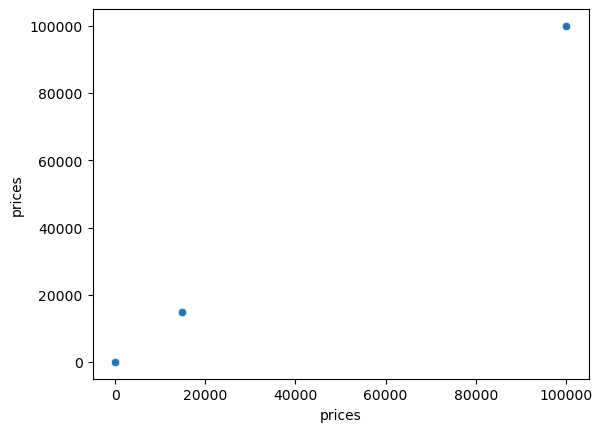

In [4]:
sns.scatterplot(x='prices', y='prices', data=df_ords_prod_merged)

In [5]:
print('Desriptive Statistics on Prices')
print(' ')
print(df_ords_prod_merged['prices'].describe())
print(' ')
print('----')
print(' ')
print('Median : ' +  str(df_ords_prod_merged['prices'].median()))

Desriptive Statistics on Prices
 
count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64
 
----
 
Median : 7.4


#### Observations

1. 2 outliers near 20,000 and 99,999 <br>
2. When exploring mean and median of prices, values are around between 7.4 and 11.3. So prices near 20,000 and 99,999 is unexpected

#### Investigate products with prices more than 100

In [6]:
# get subset of data with prices more than 100
df_prices_100 = df_ords_prod_merged[df_ords_prod_merged['prices'] > 100]
df_prices_100[['user_id', 'product_id', 'product_name', 'prices']]

,user_id,product_id,product_name,prices
10030345,17,21553,Lowfat 2% Milkfat Cottage Cheese,14900.0
10030346,17,21553,Lowfat 2% Milkfat Cottage Cheese,14900.0
10030347,135,21553,Lowfat 2% Milkfat Cottage Cheese,14900.0
10030348,135,21553,Lowfat 2% Milkfat Cottage Cheese,14900.0
10030349,342,21553,Lowfat 2% Milkfat Cottage Cheese,14900.0
...,...,...,...,...
29166209,204099,33664,2 % Reduced Fat Milk,99999.0
29166210,204099,33664,2 % Reduced Fat Milk,99999.0
29166211,204395,33664,2 % Reduced Fat Milk,99999.0
29166212,205227,33664,2 % Reduced Fat Milk,99999.0


#### Products and Prices above 100 Grouped

In [7]:
# counting rows of distinct product-price that have prices above 100
df_prices_100[['prices', 'product_name', 'product_id']].value_counts()

prices   product_name                      product_id
14900.0  Lowfat 2% Milkfat Cottage Cheese  21553         4429
99999.0  2 % Reduced Fat  Milk             33664          698
Name: count, dtype: int64

#### Observations

Lowfat 2% Milkfat Cottage Cheese and 2 % Reduced Fat  Milk are the products with unexpectedly high prices. Prices will be set to NA as the prices are incorrect

#### Prices updated to NA for products with prices above 100

In [8]:
# Setting prices to NA for products
df_ords_prod_merged.loc[(df_ords_prod_merged['prices'] > 100), 'prices'] = np.nan

In [9]:
# Double checking the update was actioned for ID 21553 (Lowfat 2% Milkfat Cottage Cheese)
df_ords_prod_merged[df_ords_prod_merged['product_id'] == '21553'][['prices', 'product_name', 'product_id']]

,prices,product_name,product_id
10030345,NaN,Lowfat 2% Milkfat Cottage Cheese,21553
10030346,NaN,Lowfat 2% Milkfat Cottage Cheese,21553
10030347,NaN,Lowfat 2% Milkfat Cottage Cheese,21553
10030348,NaN,Lowfat 2% Milkfat Cottage Cheese,21553
10030349,NaN,Lowfat 2% Milkfat Cottage Cheese,21553
...,...,...,...
10034769,NaN,Lowfat 2% Milkfat Cottage Cheese,21553
10034770,NaN,Lowfat 2% Milkfat Cottage Cheese,21553
10034771,NaN,Lowfat 2% Milkfat Cottage Cheese,21553
10034772,NaN,Lowfat 2% Milkfat Cottage Cheese,21553


In [10]:
# Double checking the update was actioned for ID 33664 (2 % Reduced Fat  Milk)
df_ords_prod_merged[df_ords_prod_merged['product_id'] == '33664'][['prices', 'product_name', 'product_id']]

,prices,product_name,product_id
29165516,NaN,2 % Reduced Fat Milk,33664
29165517,NaN,2 % Reduced Fat Milk,33664
29165518,NaN,2 % Reduced Fat Milk,33664
29165519,NaN,2 % Reduced Fat Milk,33664
29165520,NaN,2 % Reduced Fat Milk,33664
...,...,...,...
29166209,NaN,2 % Reduced Fat Milk,33664
29166210,NaN,2 % Reduced Fat Milk,33664
29166211,NaN,2 % Reduced Fat Milk,33664
29166212,NaN,2 % Reduced Fat Milk,33664


In [11]:
df_ords_prod_merged['prices'].max()

25.0

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

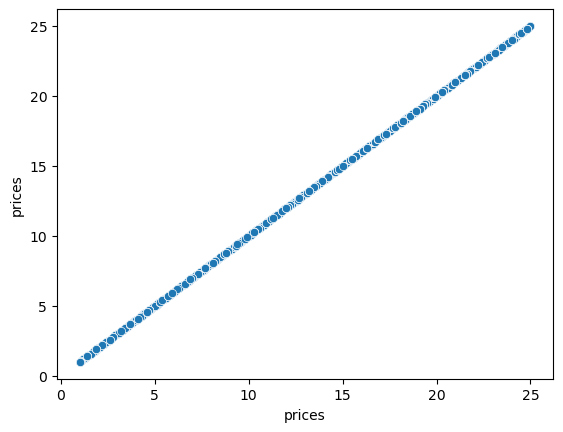

In [12]:
sns.scatterplot(x='prices', y='prices', data=df_ords_prod_merged)

## Find averages of subsetted data

### Subset 1M rows

In [14]:
df = df_ords_prod_merged.loc[:1000000]
df.shape

(1000001, 18)

### Find average orders for each department

In [15]:
# using group and mean aggredate function
df.groupby('department_id').agg({'number_of_orders' : ['mean']})

,number_of_orders
,mean
department_id,
4,18.825780
7,17.472355
13,17.993423
14,19.246334
16,19.463012
17,11.294069
19,19.305237
20,17.599704


In [16]:
# grouping department_id to get mean orders per department. Using different code structure
df.groupby('department_id')['number_of_orders'].mean()

department_id
4     18.825780
7     17.472355
13    17.993423
14    19.246334
16    19.463012
17    11.294069
19    19.305237
20    17.599704
Name: number_of_orders, dtype: float64

### Find descriptive statistics

In [17]:
# using group & agg function to get multiple descriptive analysis
df.groupby('department_id').agg({'number_of_orders' : ['mean', 'min', 'max']})

number_of_orders        
                          mean min max
department_id                         
4                    18.825780   1  99
7                    17.472355   1  99
13                   17.993423   1  99
14                   19.246334   1  99
16                   19.463012   1  99
17                   11.294069   1  98
19                   19.305237   1  99
20                   17.599704   1  99

## Find average orders of full dataset

In [18]:
# finding averages orders per department on full dataset
df_ords_prod_merged.groupby('department_id')['number_of_orders'].mean()

department_id
1     15.457838
2     17.277920
3     17.170395
4     17.811403
5     15.215751
6     16.439806
7     17.225802
8     15.340650
9     15.895474
10    20.197148
11    16.170638
12    15.887671
13    16.583536
14    16.773669
15    16.165037
16    17.665606
17    15.694469
18    19.310397
19    17.177343
20    16.473447
21    22.902379
Name: number_of_orders, dtype: float64

### Step 3. Comparing departments mean between subsets and full dataset

1. Mean orders of all 21 departments is captured instead of only 8 <br>
2. Household department mean orders is no longer significantly low as indicated by the subset dataset <br>
3. Departments 21, 10 and 18 have highest mean orders. This was not the case when querying the subset <br>
4. Mean of departments in subset is mariginally higher than mean of same departments in the full dataset <br>

## Step 4. Loyalty Customers

In [19]:
# find maximum orders made by user
df_ords_prod_merged['max_orders'] = df_ords_prod_merged.groupby(['user_id'])['number_of_orders'].transform(np.max)

/var/folders/6w/mdyngzzd2_z7brmk404qky_m0000gs/T/ipykernel_93666/1822053655.py:2: FutureWarning: The provided callable <function amax at 0x107b21440> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_ords_prod_merged['max_orders'] = df_ords_prod_merged.groupby(['user_id'])['number_of_orders'].transform(np.max)


In [20]:
# sort the df by user_id to double check the max order
df_ords_prod_merged.sort_values(['user_id'], ascending=True, inplace=True)
df_ords_prod_merged.head(50)

,order_id,user_id,number_of_orders,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busy_slow_days,busiest_hours,max_orders
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regular busy,Regular days,Average orders,10
447087,2254736,1,4,4,7,29.0,25133,4,1,Organic String Cheese,21,16,8.6,both,Mid-range product,Least busy,Slowest days,Average orders,10
447086,473747,1,3,3,12,21.0,25133,4,0,Organic String Cheese,21,16,8.6,both,Mid-range product,Regular busy,Slowest days,Most orders,10
443337,2550362,1,10,4,8,30.0,13032,8,1,Cinnamon Toast Crunch,121,14,4.0,both,Low-range product,Least busy,Slowest days,Average orders,10
443336,550135,1,7,1,9,20.0,13032,5,1,Cinnamon Toast Crunch,121,14,4.0,both,Low-range product,Regular busy,Busiest days,Average orders,10
63886,431534,1,5,4,15,28.0,13176,8,1,Bag of Organic Bananas,24,4,10.3,both,Mid-range product,Least busy,Slowest days,Most orders,10
63885,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4,10.3,both,Mid-range product,Regular busy,Slowest days,Average orders,10
35791,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Mid-range product,Regular busy,Regular days,Average orders,10
58202,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Low-range product,Regular busy,Regular days,Average orders,10
447088,431534,1,5,4,15,28.0,25133,4,1,Organic String Cheese,21,16,8.6,both,Mid-range product,Least busy,Slowest days,Most orders,10


In [21]:
# shows all orders with user_id to confirm the max order
df_ords_prod_merged[df_ords_prod_merged['user_id'] == '19']

,order_id,user_id,number_of_orders,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busy_slow_days,busiest_hours,max_orders
10222355,1321974,19,1,6,13,NaN,11749,24,0,French Vanilla Liquid Coffee Creamer,53,16,9.3,both,Mid-range product,Regular busy,Regular days,Most orders,9
10222428,1321974,19,1,6,13,NaN,45037,25,0,Lemon Dish Liquid,74,17,8.5,both,Mid-range product,Regular busy,Regular days,Most orders,9
10276990,2474845,19,6,5,13,20.0,33122,6,0,Peanut Butter Dark Chocolate Protein Chewy Bars,3,19,7.0,both,Mid-range product,Regular busy,Regular days,Most orders,9
10237199,1973799,19,5,6,12,8.0,27138,17,1,Vermont White Cheddar Macaroni & Cheese Dinner,4,9,12.2,both,Mid-range product,Regular busy,Regular days,Most orders,9
10202169,2474845,19,6,5,13,20.0,1832,15,1,Moisture Milks Strawberries & Cream Moisturizi...,22,11,11.1,both,Mid-range product,Regular busy,Regular days,Most orders,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10350371,532817,19,7,4,17,6.0,44870,29,0,Franks,106,12,23.6,both,High-range product,Least busy,Slowest days,Average orders,9
10283529,532817,19,7,4,17,6.0,43772,7,0,Cherubs Heavenly Salad Tomatoes,83,4,4.1,both,Low-range product,Least busy,Slowest days,Average orders,9
10219418,2208892,19,3,0,14,16.0,35123,3,1,Grilled & Ready Chicken Breast Strips,34,1,1.1,both,Low-range product,Busiest day,Busiest days,Most orders,9
10405047,86918,19,9,5,16,8.0,14147,12,0,Sweet Cream Salted Butter,36,16,14.0,both,Mid-range product,Regular busy,Regular days,Average orders,9


In [22]:
# set loyalty flag

df_ords_prod_merged.loc[df_ords_prod_merged['max_orders'] > 40, 'loyalty_flag'] = "Loyal customer"
df_ords_prod_merged.loc[(df_ords_prod_merged['max_orders'] > 10) & (df_ords_prod_merged['max_orders'] <= 40), 'loyalty_flag'] = "Regular customer"
df_ords_prod_merged.loc[df_ords_prod_merged['max_orders'] <= 10, 'loyalty_flag'] = "New customer"

df_ords_prod_merged.value_counts('loyalty_flag')

/var/folders/6w/mdyngzzd2_z7brmk404qky_m0000gs/T/ipykernel_93666/2652742831.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Loyal customer' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_ords_prod_merged.loc[df_ords_prod_merged['max_orders'] > 40, 'loyalty_flag'] = "Loyal customer"


loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

### Purchased Product Prices Statistics of Customers

In [23]:
# descriptive statistics on loyalty flag using group and agg functions
df_ords_prod_merged.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max', 'median', 'std', 'count']})

prices                                      
                      mean  min   max median       std     count
loyalty_flag                                                    
Loyal customer    7.773575  1.0  25.0    7.4  4.206151  10282763
New customer      7.801206  1.0  25.0    7.4  4.266834   6242841
Regular customer  7.798262  1.0  25.0    7.4  4.254886  15874128

#### Observations

1. Purchased Product prices of loyal customers is marignally lower than of regular and new customers
2. New customers purchased product prices are the highest

## Different Type of Spenders

#### Find mean expenses per user

In [24]:
# calculating mean expenses per user using group and transform functions
df_ords_prod_merged['mean_expenses'] = df_ords_prod_merged.groupby(['user_id'])['prices'].transform(np.mean)
df_ords_prod_merged.head(10)

/var/folders/6w/mdyngzzd2_z7brmk404qky_m0000gs/T/ipykernel_93666/1778000053.py:2: FutureWarning: The provided callable <function mean at 0x107b22160> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_ords_prod_merged['mean_expenses'] = df_ords_prod_merged.groupby(['user_id'])['prices'].transform(np.mean)


,order_id,user_id,number_of_orders,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,department_id,prices,_merge,price_range_loc,busiest_day,busy_slow_days,busiest_hours,max_orders,loyalty_flag,mean_expenses
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,7,9.0,both,Mid-range product,Regular busy,Regular days,Average orders,10,New customer,6.367797
447087,2254736,1,4,4,7,29.0,25133,4,1,Organic String Cheese,...,16,8.6,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797
447086,473747,1,3,3,12,21.0,25133,4,0,Organic String Cheese,...,16,8.6,both,Mid-range product,Regular busy,Slowest days,Most orders,10,New customer,6.367797
443337,2550362,1,10,4,8,30.0,13032,8,1,Cinnamon Toast Crunch,...,14,4.0,both,Low-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797
443336,550135,1,7,1,9,20.0,13032,5,1,Cinnamon Toast Crunch,...,14,4.0,both,Low-range product,Regular busy,Busiest days,Average orders,10,New customer,6.367797
63886,431534,1,5,4,15,28.0,13176,8,1,Bag of Organic Bananas,...,4,10.3,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797
63885,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,...,4,10.3,both,Mid-range product,Regular busy,Slowest days,Average orders,10,New customer,6.367797
35791,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,16,12.5,both,Mid-range product,Regular busy,Regular days,Average orders,10,New customer,6.367797
58202,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,19,4.7,both,Low-range product,Regular busy,Regular days,Average orders,10,New customer,6.367797
447088,431534,1,5,4,15,28.0,25133,4,1,Organic String Cheese,...,16,8.6,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797


#### Based on mean expense, allocate Low or High spender

In [25]:
# if mean expense is less than 10, allocate "low spender" to the customer
df_ords_prod_merged.loc[df_ords_prod_merged['mean_expenses'] < 10, 'spender_type'] = "Low spender"

# if mean expense is more than or equal to 10, allocate "high spender" to the customer
df_ords_prod_merged.loc[df_ords_prod_merged['mean_expenses'] >= 10, 'spender_type'] = "High spender"

df_ords_prod_merged.head()

/var/folders/6w/mdyngzzd2_z7brmk404qky_m0000gs/T/ipykernel_93666/1467513565.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low spender' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_ords_prod_merged.loc[df_ords_prod_merged['mean_expenses'] < 10, 'spender_type'] = "Low spender"


,order_id,user_id,number_of_orders,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,_merge,price_range_loc,busiest_day,busy_slow_days,busiest_hours,max_orders,loyalty_flag,mean_expenses,spender_type
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,9.0,both,Mid-range product,Regular busy,Regular days,Average orders,10,New customer,6.367797,Low spender
447087,2254736,1,4,4,7,29.0,25133,4,1,Organic String Cheese,...,8.6,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender
447086,473747,1,3,3,12,21.0,25133,4,0,Organic String Cheese,...,8.6,both,Mid-range product,Regular busy,Slowest days,Most orders,10,New customer,6.367797,Low spender
443337,2550362,1,10,4,8,30.0,13032,8,1,Cinnamon Toast Crunch,...,4.0,both,Low-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender
443336,550135,1,7,1,9,20.0,13032,5,1,Cinnamon Toast Crunch,...,4.0,both,Low-range product,Regular busy,Busiest days,Average orders,10,New customer,6.367797,Low spender


In [26]:
# count the spender type rows
df_ords_prod_merged.value_counts('spender_type')

spender_type
Low spender     32285131
High spender      119728
Name: count, dtype: int64

## Frequent vs Non-Frequent Customers

#### Find the median of days_since_prior_order per user

In [27]:
# calculate the median days prior per use using groupby and transform functions
df_ords_prod_merged['median_days_prior_purchase'] = df_ords_prod_merged.groupby(['user_id'])['days_since_prior_order'].transform(np.median)
df_ords_prod_merged[['user_id','days_since_prior_order','median_days_prior_purchase',]].head(10)

/var/folders/6w/mdyngzzd2_z7brmk404qky_m0000gs/T/ipykernel_93666/673050754.py:2: FutureWarning: The provided callable <function median at 0x107c74540> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_ords_prod_merged['median_days_prior_purchase'] = df_ords_prod_merged.groupby(['user_id'])['days_since_prior_order'].transform(np.median)


,user_id,days_since_prior_order,median_days_prior_purchase
0,1,NaN,20.5
447087,1,29.0,20.5
447086,1,21.0,20.5
443337,1,30.0,20.5
443336,1,20.0,20.5
63886,1,28.0,20.5
63885,1,15.0,20.5
35791,1,NaN,20.5
58202,1,NaN,20.5
447088,1,28.0,20.5


In [28]:
# printing median days prior purchase per user for checks
df_ords_prod_merged.groupby(['user_id'])['median_days_prior_purchase'].max()

user_id
1        20.5
10       23.0
100      26.0
1000      7.0
10000     4.0
         ... 
99995    14.0
99996    18.0
99997    14.0
99998     9.0
99999     6.0
Name: median_days_prior_purchase, Length: 206209, dtype: float32

In [29]:
# double checking the median days prior purchase is correct for users printed above
temp_df = df_ords_prod_merged[df_ords_prod_merged['user_id'] == '1000']
temp_df[['days_since_prior_order']].median()

days_since_prior_order    7.0
dtype: float32

#### Based on the median, allocate if frequent or non-frequent customer

In [30]:
# Non-frequent customer if median days prior to purchase is more than 20 days
df_ords_prod_merged.loc[(df_ords_prod_merged['median_days_prior_purchase'] > 20), 'frequency_cust_type'] = "Non-frequent customer"

# Reqular customer if median days prior to purchase is more than between 10 and 20 days
df_ords_prod_merged.loc[(df_ords_prod_merged['median_days_prior_purchase'] > 10) & (df_ords_prod_merged['median_days_prior_purchase'] <= 20), 'frequency_cust_type'] = "Regular customer"

# Frequent customer if median days prior to purchase is less than 10 days
df_ords_prod_merged.loc[(df_ords_prod_merged['median_days_prior_purchase'] <= 10), 'frequency_cust_type'] = "Frequent customer"
                        

/var/folders/6w/mdyngzzd2_z7brmk404qky_m0000gs/T/ipykernel_93666/687220213.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Non-frequent customer' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_ords_prod_merged.loc[(df_ords_prod_merged['median_days_prior_purchase'] > 20), 'frequency_cust_type'] = "Non-frequent customer"


In [31]:
# frequency customer type counts
df_ords_prod_merged['frequency_cust_type'].value_counts()

frequency_cust_type
Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
Name: count, dtype: int64

In [32]:
# printing subset of columbs to double check frequency_cust_type 
df_ords_prod_merged[['user_id', 'days_since_prior_order', 'median_days_prior_purchase', 'frequency_cust_type']]

,user_id,days_since_prior_order,median_days_prior_purchase,frequency_cust_type
0,1,NaN,20.5,Non-frequent customer
447087,1,29.0,20.5,Non-frequent customer
447086,1,21.0,20.5,Non-frequent customer
443337,1,30.0,20.5,Non-frequent customer
443336,1,20.0,20.5,Non-frequent customer
...,...,...,...,...
29297865,99999,5.0,6.0,Frequent customer
14031698,99999,9.0,6.0,Frequent customer
17570716,99999,NaN,6.0,Frequent customer
17823261,99999,4.0,6.0,Frequent customer


### Export as pkl file

In [33]:
df_ords_prod_merged.to_pickle(os.path.join(path, 'Prepared Data/orders_product_cust_types.pkl'))